$\delta_r \cdot \frac{\lambda}{2\pi} + 2\cdot d \cdot\cos\theta = N\lambda$

$\cos\theta = \frac{N\lambda - \frac{\delta_r\lambda}{2\pi}}{2d}$

In [30]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import os
import sys
from jax import grad
from jax import numpy as jnp

dir_path = os.path.abspath('')
sys.path.append(dir_path + '/../')

from giopy import Interpolazione, final_val

sys.path.append(dir_path)

dir_path = os.path.abspath('')
FILE = dir_path + '/data/' + 'coseno_legge2.csv'
fr = pd.read_csv(FILE)
fr

,N,raggio interferenza 1 (cm),raggio interferenza 2 (cm),raggio interferenza 3 (cm),sigma raggio (mm),raggio (cm),sigmaraggio (cm),distanza (cm),spessore lente (mm),valore focale lente
0,0,1.4,1.5,1.1,1.0,1.3333,0.3122,177.5,6.65,18mm
1,1,2.6,2.1,2.6,NaN,2.4333,0.4330,177.6,NaN,NaN
2,2,3.5,3.4,3.4,NaN,3.4333,0.0866,177.5,NaN,NaN
3,3,4.1,4.0,4.1,NaN,4.0667,0.0866,177.4,NaN,NaN
4,4,4.7,4.6,4.6,NaN,4.6333,0.0866,177.3,NaN,NaN
5,5,5.2,5.0,5.1,NaN,5.1000,0.1500,NaN,NaN,NaN
6,6,5.6,5.4,5.6,NaN,5.5333,0.1732,NaN,NaN,NaN
7,7,6.1,5.8,6.0,NaN,5.9667,0.2291,NaN,NaN,NaN
8,8,6.4,6.2,6.4,NaN,6.3333,0.1732,NaN,NaN,NaN


In [31]:
dy = np.array(fr['raggio (cm)']) * 0.01# misura sul muro
sigmady = np.array(fr['sigmaraggio (cm)']) * 0.01

dx = 0.177

N = np.array(fr['N'])
sigmaN = np.zeros(len(N))
λ = 632.8 * 10**(-9)

----------------- VALORI FIT: -----------------
dx: (1.77 ± nan)e-1 
A: (6.043 ± nan)e-7 
B: (2.0 ± nan)e-6 

dof: 6
chi2: nan
chi2 ridotto: nan
pvalue: nan
------------------------------------------------



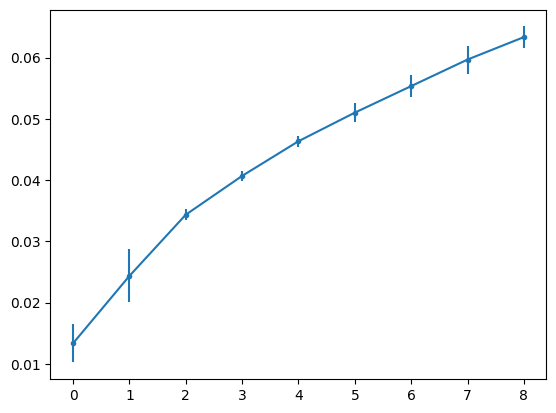

In [32]:
def raggio_interferenza(N,dx,A,B):
    return dx * jnp.tan(jnp.arccos((N*λ - A)/B))

A_guess = λ/(2*np.pi) * 6
B_guess = 2*0.000001 # 2*d

fit = Interpolazione(N, dy, sigmady,sigmaN, raggio_interferenza,guess=[0.177,A_guess,B_guess],names=['dx','A','B'])
print(fit)


plt.errorbar(N,dy,yerr=sigmady,xerr=sigmaN,fmt='.-')

plt.show()

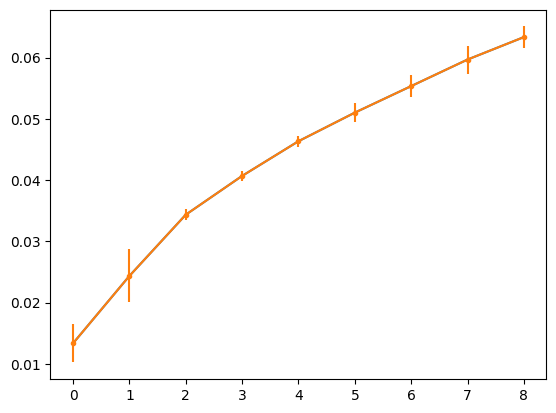

In [35]:
teta = np.arctan(dy/dx)
plt.plot(N,dx*np.tan(teta))
plt.errorbar(N,dy,yerr=sigmady,xerr=sigmaN,fmt='.-')
plt.show()